In [10]:
import pandas as pd
import os
import sys
import importlib

import matplotlib.pyplot as plt
import country_converter as coco

In [11]:
# !{sys.executable} -m pip install country_converter

In [12]:
user_module_path = './'
module_path = os.path.abspath(os.path.join(user_module_path))

import fetch_data

In [13]:
def reload_module(module,
                 user_module_path = './'):
    # Block to handle reloading user modules
    module_path = os.path.abspath(os.path.join(user_module_path))
    if module_path not in sys.path:
        sys.path.append(module_path)
    importlib.reload(module)
    fetch_data.test_refresh()

### Testing Data

Testing data from [Our World in Data](https://ourworldindata.org/coronavirus-testing)

In [14]:
# def fetch_owid(save_file=True,
#                filename = 'owid_covid.csv',
#                threshold=1,
#                data_path='assets/'):
#     if fetch_data.check_file_age(filename, threshold):
#         return pd.read_csv(f'{data_path}{filename}')
#     owid_covid_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    
#     owid_columns_sel = ['iso_code', 'date', 'tests_units', 'population',
#                   'population_density', 'median_age',
#                   'aged_65_older', 'aged_70_older',
#                   'gdp_per_capita', 'extreme_poverty',
#                   'cvd_death_rate', 'diabetes_prevalence',
#                   'female_smokers', 'male_smokers',
#                   'handwashing_facilities', 'hospital_beds_per_thousand']
#     owid_covid_df.columns = [ f"owid_{x}" for x in owid_covid_df.columns ]
#     owid_columns_sel = [ f"owid_{x}" for x in owid_columns_sel ]

#     owid_covid_df = owid_covid_df[owid_columns_sel]
#     owid_covid_df['owid_date'] = pd.to_datetime(owid_covid_df['owid_date'])
#     if save_file:
#         owid_covid_df.to_csv(f"{data_path}{filename}", index=False)
    

In [15]:
# def merge_owid(full_df):
#     owid_covid_df = fetch_owid()
    
#     non_covid_cols = ['Country/Region', 'Province/State', 'ISO3166:2', 'ISO3166:3',
#            'ISO3166:#', 'Name', 'Population', 'GDP (Total)',
#            'Life Expectancy (Male)', 'Life Expectancy (Female)', 'Date']

#     last_date = full_df['Date'].unique()[-1]

#     noncovid_sdf = full_df.loc[full_df['Date'] == last_date][non_covid_cols]

#     owid_dates = set(owid_covid_df['owid_date'].unique())
#     jh_dates = set(full_df['Date'].unique())

#     owid_only = sorted(list(owid_dates - jh_dates))
#     common_dates = sorted(list(owid_dates.intersection(jh_dates)))

#     mz_df_columns = list(full_df.columns) + list(owid_covid_df.columns)

#     owid_covid_df.loc[owid_covid_df['owid_iso_code'] == 'OWID_WRL', 'owid_iso_code'] = 'WLD'

#     megazord_df = pd.DataFrame(columns=mz_df_columns)

#     for date in owid_only:
#         owid_sdf = owid_covid_df.loc[owid_covid_df['owid_date'] == date]
#         temp_sdf = noncovid_sdf.merge(owid_sdf, how='left', left_on='ISO3166:3',
#                                  right_on='owid_iso_code')
#         temp_sdf['Date'] = temp_sdf['owid_date'] 
#         megazord_df = pd.concat([megazord_df, temp_sdf])

#     for date in common_dates:
#         owid_sdf = owid_covid_df.loc[owid_covid_df['owid_date'] == date]
#         full_sdf = full_df.loc[full_df['Date'] == date]
#         full_sdf = full_sdf.merge(owid_sdf, how='left', left_on='ISO3166:3',
#                                  right_on='owid_iso_code')
#         megazord_df = pd.concat([megazord_df, full_sdf])
        
#     return megazord_df

### OWID data

In [24]:
owid_covid_df = owid_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [25]:
owid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

### Load Other Data

In [48]:
reload_module(fetch_data)

Refreshed at 2020-06-08 16:04:49.770892


In [44]:
indicator_names = {"SP.POP.TOTL" : "population",
					"NY.GDP.MKTP.CD" : "gdp_total",
					"SP.DYN.LE00.MA.IN" : "lifeExp_male",
					"SP.DYN.LE00.FE.IN" : "lifeExp_female" }

cv_merged_df, iso_codes_df, indicator_df = fetch_data.fetch_components(indicator_names)

full_df = fetch_data.build_full_df(cv_merged_df)
full_owid_df = fetch_data.merge_owid(full_df)

Refreshed at 2020-06-08 16:03:07.936806
>> File  [ merged_df_global.csv ] found. Checking age... 
	+ File  [ merged_df_global.csv ] not expired. Load from disk...
>> File  [ ISO_codes.csv ] found. Checking age... 
	+ File  [ ISO_codes.csv ] not expired. Load from disk...
>> File  [ wb_indicators.csv ] found. Checking age... 
	+ File  [ wb_indicators.csv ] not expired. Load from disk...
>> File  [ ISO_codes.csv ] found. Checking age... 
	+ File  [ ISO_codes.csv ] not expired. Load from disk...
>> File  [ owid_covid_raw.csv ] found. Checking age... 
	+ File  [ owid_covid_raw.csv ] not expired. Load from disk...
>> Merging OWID data...


In [45]:
full_owid_df = full_owid_df.drop_duplicates()

In [46]:
full_owid_df = fetch_data.generate_features(full_owid_df)

In [49]:
fetch_data.rename_select_columns(full_owid_df)

{'Country/Region': 'Country/Region', 'Province/State': 'Province/State', 'ISO3166_alpha2': 'ISO3166:2', 'ISO3166_alpha3': 'ISO3166:3', 'ISO3166_numeric': 'ISO3166:#', 'DisplayName': 'Name', 'population': 'Population', 'gdp_total': 'GDP (Total)', 'lifeExp_male': 'Life Expectancy (Male)', 'lifeExp_female': 'Life Expectancy (Female)', 'Date': 'Date', 'confirmed_total': 'Confirmed (Total)', 'deaths_total': 'Deaths (Total)', 'recovered_total': 'Recovered (Total)', 'active_total': 'Active (Total)', 'confirmed_total_norm': 'Confirmed (Total, normalised)', 'deaths_total_norm': 'Deaths (Total, normalised)', 'recovered_total_norm': 'Recovered (Total, normalised)', 'active_total_norm': 'Active (Total, normalised)', 'confirmed_total_pct': 'Confirmed (Total, percent)', 'deaths_total_pct': 'Deaths (Total, percent)', 'recovered_total_pct': 'Recovered (Total, percent)', 'active_total_pct': 'Active (Total, percent)', 'confirmed_daily': 'Confirmed (Daily)', 'deaths_daily': 'Deaths (Daily)', 'recovered_d

KeyError: "['Recovered (Daily, percent)', 'Confirmed (Daily, percent)', 'Deaths (Daily, percent)', 'Active (Total, percent)', 'Confirmed (Total, percent)', 'Active (Daily, percent)', 'Deaths (Total, percent)', 'Recovered (Total, percent)'] not in index"

In [20]:
# full_df.reset_index(inplace=True, drop=True)

### Country Converter exploration

In [164]:
def map_iso3_to_name(country_list):
    subset_df = full_df.loc[full_df['ISO3166:3'].isin(country_list)][['Name','ISO3166:3']]
    subset_df = subset_df.drop_duplicates()
    subset_dict = dict(zip(subset_df['ISO3166:3'], subset_df['Name']))
    return [subset_dict[x] for x in country_list]

In [165]:
map_iso3_to_name(EU_states)

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'United Kingdom']

### Preliminaries

In [229]:
eu_df = owid_covid_df.loc[(owid_covid_df['owid_iso_code'].isin(EU_states))]

In [230]:
recent_eu_df = eu_df.loc[eu_df.owid_date > '2020-04-01']

In [231]:
def prop_test(df):
    print(f"{df['owid_new_tests'].count() / df.shape[0]:0.3f}")

In [232]:
prop_test(owid_covid_df)
prop_test(eu_df)
prop_test(recent_eu_df)

0.239
0.424
0.652


In [233]:
state_iso3 = "ITA"
recent_eu_df.loc[recent_eu_df['owid_iso_code'] == state_iso3]

,owid_iso_code,owid_continent,owid_location,owid_date,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,...,owid_aged_65_older,owid_aged_70_older,owid_gdp_per_capita,owid_extreme_poverty,owid_cvd_death_rate,owid_diabetes_prevalence,owid_female_smokers,owid_male_smokers,owid_handwashing_facilities,owid_hospital_beds_per_thousand
10301,ITA,Europe,Italy,2020-04-02,110574,4782,13157,727,1828.823,79.091,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
10302,ITA,Europe,Italy,2020-04-03,115242,4668,13917,760,1906.029,77.206,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
10303,ITA,Europe,Italy,2020-04-04,119827,4585,14681,764,1981.862,75.833,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
10304,ITA,Europe,Italy,2020-04-05,124632,4805,15362,681,2061.334,79.472,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
10305,ITA,Europe,Italy,2020-04-06,128948,4316,15889,527,2132.718,71.384,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10361,ITA,Europe,Italy,2020-06-01,233019,355,33415,75,3853.985,5.871,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
10362,ITA,Europe,Italy,2020-06-02,233197,178,33475,60,3856.929,2.944,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
10363,ITA,Europe,Italy,2020-06-03,233515,318,33530,55,3862.189,5.260,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
10364,ITA,Europe,Italy,2020-06-04,233836,321,33601,71,3867.498,5.309,...,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18


ESP failed. No testing data found...


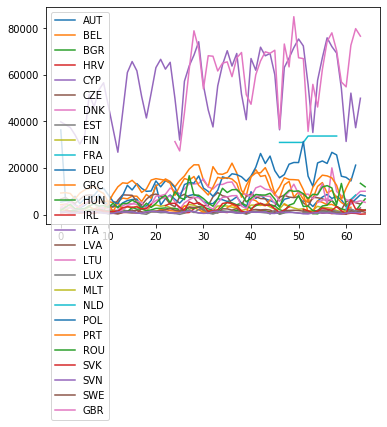

In [234]:
x_val = range(recent_eu_df.loc[recent_eu_df['owid_iso_code'] == 'ITA'].shape[0])
for state_iso3 in EU_states:
    try:
        subset = recent_eu_df.loc[recent_eu_df['owid_iso_code'] == state_iso3]['owid_new_tests']
        plt.plot(x_val, subset, label=state_iso3)
    except:
        print(f"{state_iso3} failed. No testing data found...")
plt.legend()

### Cultural dimensions

From [ https://www.researchgate.net/post/Are_there_any_alternatives_for_the_dimensions_of_national_culture ]

_See Myers, M. D. and F. B. Tan (2002). "Beyond Models of National Culture in Information Systems Research." Journal of Global Information Management 10(2).
There is an interesting debate on this: Baskerville, R. F. (2003). "Hofstede never studied culture." Accounting, Organizations and Society 28(1): 1-14. Hofstede replied with Hofstede, G. (2003). "What is culture? A reply to Baskerville." Accounting, Organizations and Society 28: 811-813._

In [505]:
# Pull this into a function and then merge it with the other stuff...

# hofstede_url = "https://geerthofstede.com/wp-content/uploads/2016/08/6-dimensions-for-website-2015-08-16.csv"
hofstede_df = pd.read_csv('assets/6-dimensions-for-website-2015-08-16.csv',sep=";",na_values="#NULL!")

eu_states_iso = list(cc.data.loc[cc.data.EU <= 2017]['ISO3'].values)

# This gets all of the ones that are correct
first_pass = list(hofstede_df.loc[hofstede_df['ctr'].isin(eu_states_iso)]['ctr'])
missing_iso = sorted(list(set(eu_states_iso) - set(first_pass)))
missing_countries = eu_df.loc[eu_df['owid_iso_code'].isin(missing_iso), ['owid_iso_code', 'owid_location']].drop_duplicates()
# Slovakia is still wrong, so fix manually...
missing_countries.loc[missing_countries['owid_location'] == 'Slovakia', 'owid_location'] = 'Slovak Rep'
hofstede_codes = [hofstede_df.loc[hofstede_df['country'] == x, 'ctr'].values[0] for x in list(missing_countries['owid_location'])]
hofstede_codes += first_pass

eu_indicators = hofstede_df.loc[hofstede_df['ctr'].isin(hofstede_codes)]
# Then fix the codes back to ISO so it can be merged back to everything else...

In [516]:
import matplotlib.pyplot as plt

array([[51., 42., 86., 48., 44.]])

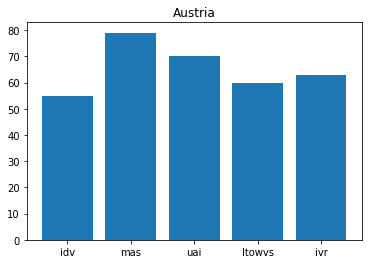

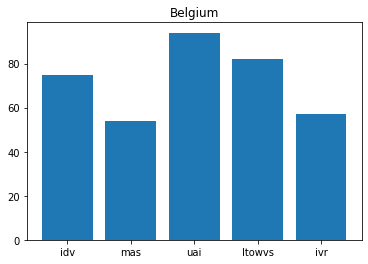

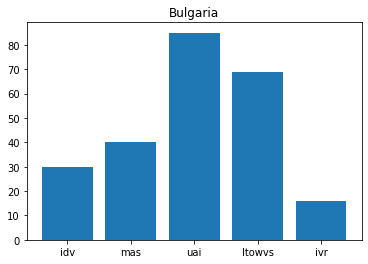

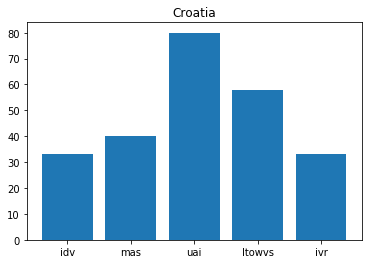

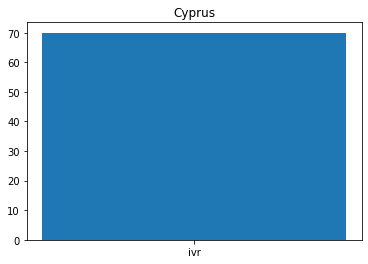

In [549]:
for country in eu_indicators['country'][:5]:
    heights = eu_indicators.loc[eu_indicators['country'] == country].iloc[:,3:].values[0]
    heights = list(heights)

    plt.bar(eu_indicators.columns[3:],height = heights)
    plt.title(country)
    plt.show()
    

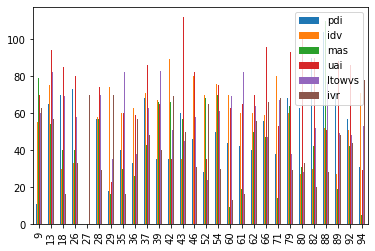

In [510]:
eu_indicators[''.plot(kind='bar')

In [545]:
eu_states_iso = list(cc.data.loc[cc.data.EU <= 2017]['ISO3'].values)

In [546]:
oecd_states_iso = list(cc.data.loc[cc.data.OECD <= 2017]['ISO3'].values)

In [547]:
set(eu_states_iso) - set(oecd_states_iso)

{'BGR', 'CYP', 'HRV', 'LTU', 'MLT', 'ROU'}

In [548]:
set(oecd_states_iso) - set(eu_states_iso)

{'AUS',
 'CAN',
 'CHE',
 'CHL',
 'ISL',
 'ISR',
 'JPN',
 'KOR',
 'MEX',
 'NOR',
 'NZL',
 'TUR',
 'USA'}

---

### OECD API


### Eurostat API

In [5]:
import eurostat


/anaconda3/envs/r_env/lib/python3.7/site-packages/pandasdmx/remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  'to Session() have no effect', RuntimeWarning)


In [6]:
# import sys
# !{sys.executable} -m pip install eurostat

In [8]:
eurostat.get_toc_df()

,title,code,type,last update of data,last table structure change,data start,data end
0,Database by themes,data,folder,,,,
1,General and regional statistics,general,folder,,,,
2,European and national indicators for short-ter...,euroind,folder,,,,
3,Business and consumer surveys (source: DG ECFIN),ei_bcs,folder,,,,
4,Consumer surveys (source: DG ECFIN),ei_bcs_cs,folder,,,,
...,...,...,...,...,...,...,...
9923,Enterprises that provided training to develop/...,isoc_ske_ittn2,dataset,13.01.2020,27.02.2020,2012,2019
9924,Participation in education and training - cont...,sks_devcvt,folder,,,,
9925,Enterprises providing training by type of trai...,trng_cvt_01s,dataset,26.02.2019,27.02.2020,2005,2015
9926,Participants in CVT courses by sex and size cl...,trng_cvt_12s,dataset,26.02.2019,27.02.2020,2005,2015
